<a href="https://colab.research.google.com/github/Yaseerkhan001/Bike-sharing-demand-predication/blob/main/ML_Capstone_Project_1_Trial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns                

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import xgboost as xgb



import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Loading Dataset
df = pd.read_csv("/content/drive/MyDrive/Sample Data/SeoulBikeData.csv", encoding = "unicode_escape")

In [ ]:
pd.pandas.set_option('display.max_columns',None)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe(include="all")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [ ]:
#Checking for Duplicates
df.duplicated().sum()

0

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:
fff = df.groupby('Functioning Day').sum()['Rented Bike Count']
fff

Functioning Day
No           0
Yes    6172314
Name: Rented Bike Count, dtype: int64

Zero bikes were rented on Non-Functioning Day. So we can remove all entries from non functioning day and then can remove the functioning day column too.


In [ ]:
df1=df.drop(df[df['Functioning Day'] == 'No'].index) 

In [ ]:
df1.drop(['Functioning Day'], axis = 1,inplace = True)

In [ ]:
df1.shape

(8465, 15)

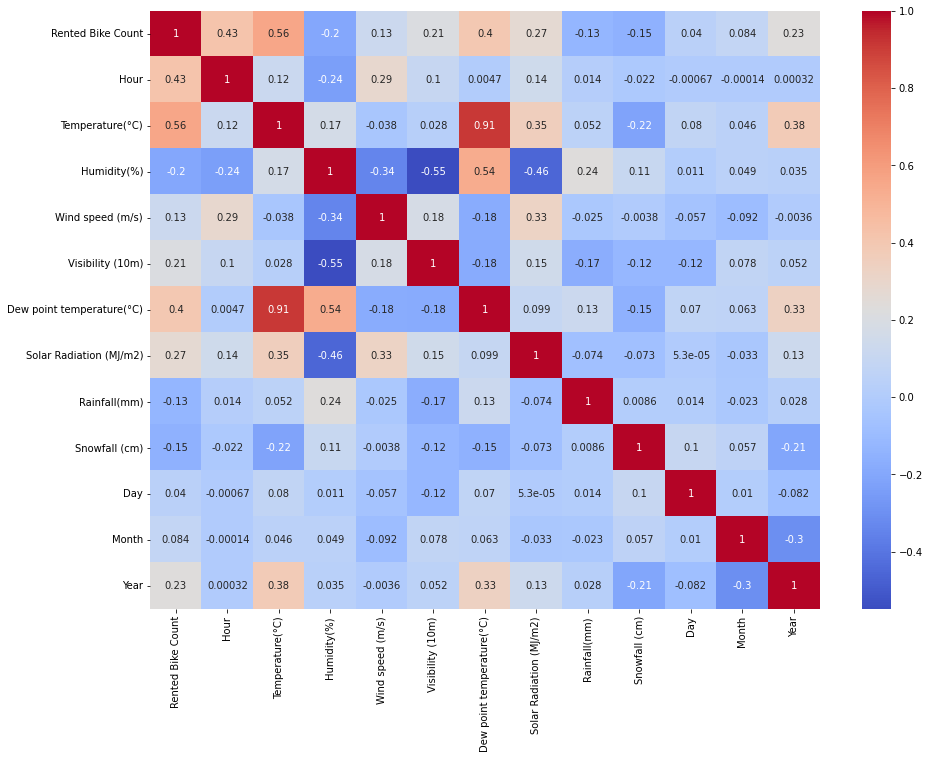

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(df1.corr(), cmap='coolwarm', annot=True)

In [ ]:
#Droping Dew point temperature(°C) from dataset df1 as it is highly correlated to the Temperature.
df1.drop(columns=['Dew point temperature(°C)'],inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Hour                     8465 non-null   int64  
 2   Temperature(°C)          8465 non-null   float64
 3   Humidity(%)              8465 non-null   int64  
 4   Wind speed (m/s)         8465 non-null   float64
 5   Visibility (10m)         8465 non-null   int64  
 6   Solar Radiation (MJ/m2)  8465 non-null   float64
 7   Rainfall(mm)             8465 non-null   float64
 8   Snowfall (cm)            8465 non-null   float64
 9   Seasons                  8465 non-null   object 
 10  Holiday                  8465 non-null   object 
 11  Day                      8465 non-null   int64  
 12  Month                    8465 non-null   int64  
 13  Year                     8465 non-null   int64  
dtypes: float64(5), int64(7),

In [ ]:
numcol = list(set(df1.columns) - {"Seasons","Holiday"})
print(numcol)

['Rainfall(mm)', 'Temperature(°C)', 'Wind speed (m/s)', 'Month', 'Humidity(%)', 'Rented Bike Count', 'Solar Radiation (MJ/m2)', 'Snowfall (cm)', 'Day', 'Year', 'Visibility (10m)', 'Hour']


In [ ]:
len(numcol)

12

In [ ]:
numdf = df1[numcol]

In [ ]:
numdf.head()

,Rainfall(mm),Temperature(°C),Wind speed (m/s),Month,Humidity(%),Rented Bike Count,Solar Radiation (MJ/m2),Snowfall (cm),Day,Year,Visibility (10m),Hour
0,0.0,-5.2,2.2,1,37,254,0.0,0.0,12,2017,2000,0
1,0.0,-5.5,0.8,1,38,204,0.0,0.0,12,2017,2000,1
2,0.0,-6.0,1.0,1,39,173,0.0,0.0,12,2017,2000,2
3,0.0,-6.2,0.9,1,40,107,0.0,0.0,12,2017,2000,3
4,0.0,-6.0,2.3,1,36,78,0.0,0.0,12,2017,2000,4


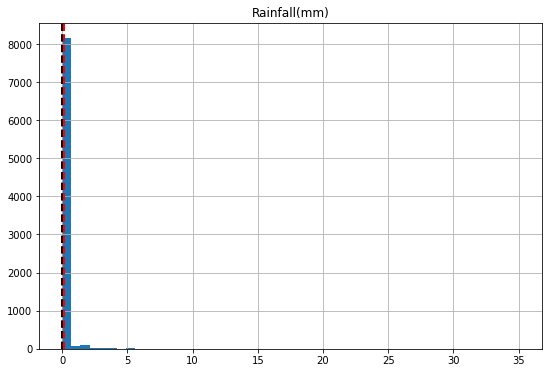

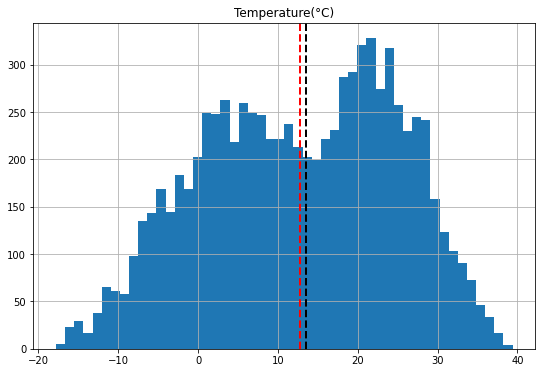

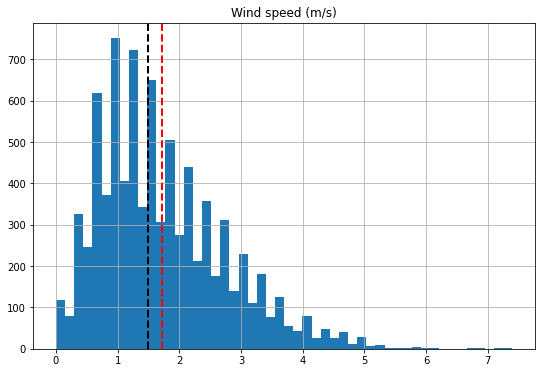

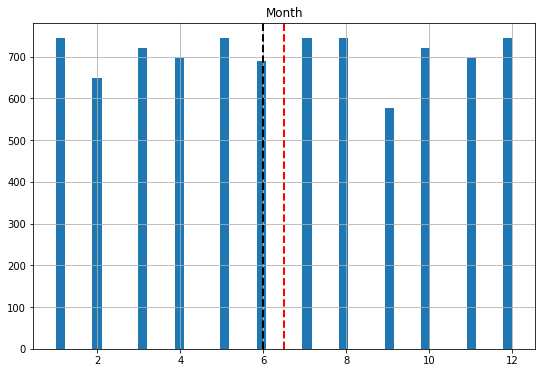

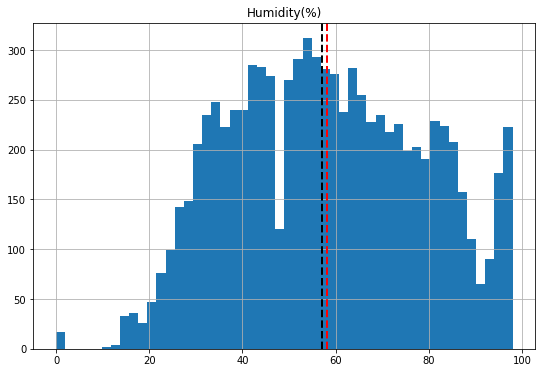

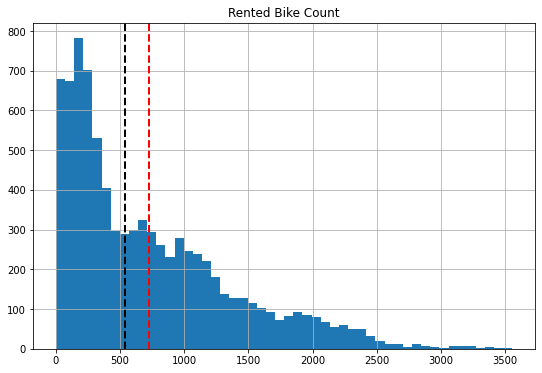

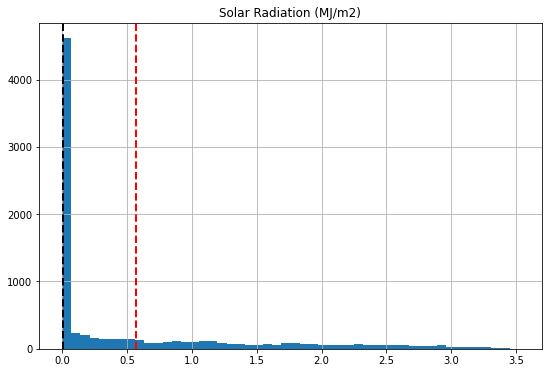

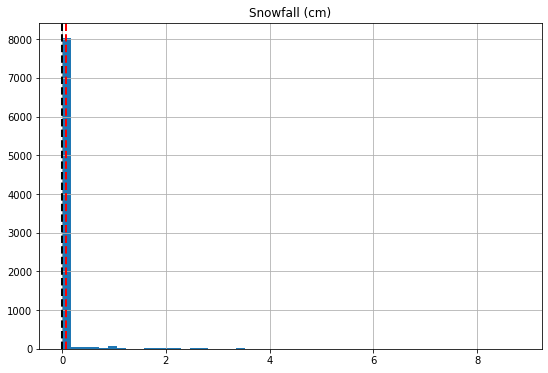

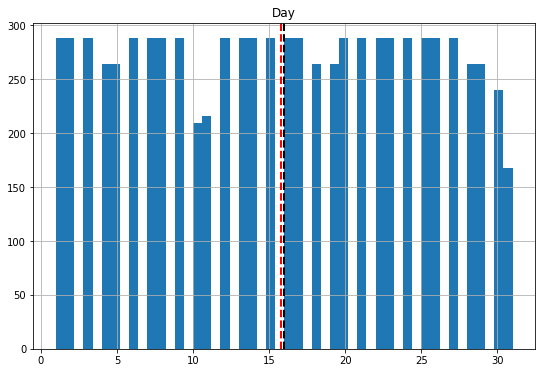

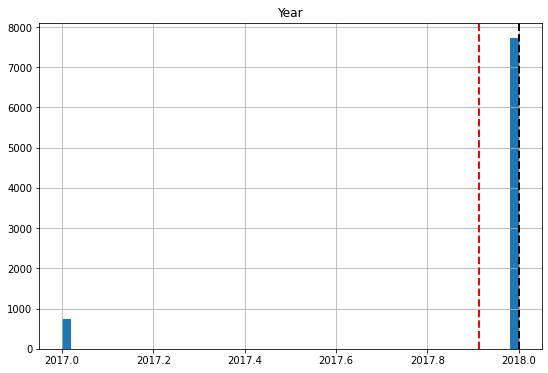

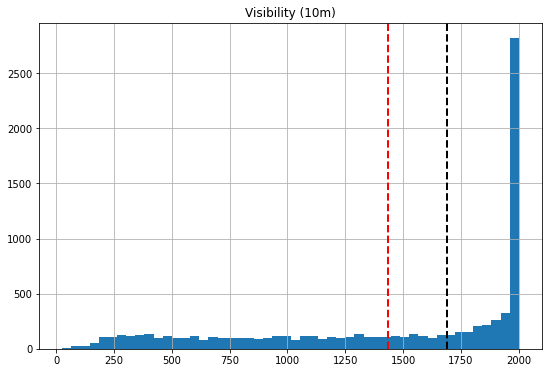

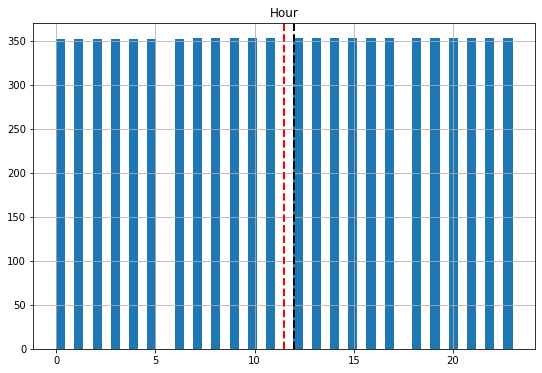

In [ ]:
for col in numcol[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df1[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='black', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
#Positive Skewed Distribution: Mode < Median < Mean: Rented Bike Count, Wind Speed(m/s), Solar Radiation(MJ/m2)

#No Skew: Mean = Median = Mode : Hour, Temperature, Humidity(%),Rainfall(mm),Snowfall(cm)

#Negative Skewed Distribution: Mean < Median < Mode: visibility(10m)

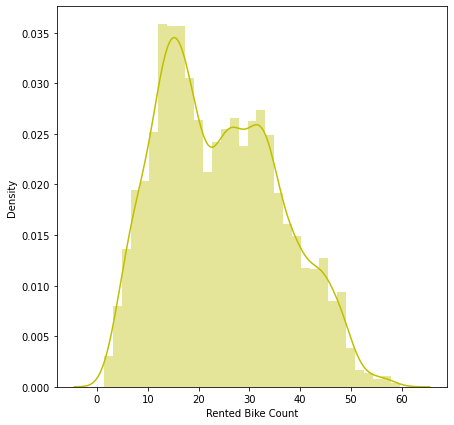

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df1['Rented Bike Count']),color="y")

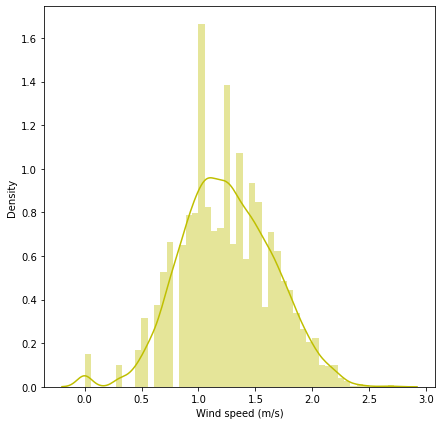

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df1['Wind speed (m/s)']),color="y")

In [ ]:
df1['Wind speed (m/s)']=np.sqrt(df1['Wind speed (m/s)'])

In [ ]:
df1['Holiday'].value_counts()

No Holiday    8057
Holiday        408
Name: Holiday, dtype: int64

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"Holiday":{"Holiday":0,"No Holiday":1},
                
                 }

df1 = df1.replace(encoders_nums)

In [ ]:
df1["Holiday"].value_counts()

1    8057
0     408
Name: Holiday, dtype: int64

In [ ]:
df1["Seasons"].value_counts()

Summer    2208
Winter    2160
Spring    2160
Autumn    1937
Name: Seasons, dtype: int64

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"Seasons":{"Summer":3,"Winter":2,"Spring":1,"Autumn":0}
                 
                 }

df1 = df1.replace(encoders_nums)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Hour                     8465 non-null   int64  
 2   Temperature(°C)          8465 non-null   float64
 3   Humidity(%)              8465 non-null   int64  
 4   Wind speed (m/s)         8465 non-null   float64
 5   Visibility (10m)         8465 non-null   int64  
 6   Solar Radiation (MJ/m2)  8465 non-null   float64
 7   Rainfall(mm)             8465 non-null   float64
 8   Snowfall (cm)            8465 non-null   float64
 9   Seasons                  8465 non-null   int64  
 10  Holiday                  8465 non-null   int64  
 11  Day                      8465 non-null   int64  
 12  Month                    8465 non-null   int64  
 13  Year                     8465 non-null   int64  
dtypes: float64(5), int64(9)


In [ ]:
indvar = list(set(df1.columns)-{"Rented Bike Count"})
indvar

['Rainfall(mm)',
 'Temperature(°C)',
 'Wind speed (m/s)',
 'Month',
 'Humidity(%)',
 'Solar Radiation (MJ/m2)',
 'Snowfall (cm)',
 'Day',
 'Seasons',
 'Year',
 'Holiday',
 'Visibility (10m)',
 'Hour']

In [ ]:
X = df1[indvar]

In [ ]:
yn = np.sqrt(df1['Rented Bike Count'])
y = df1['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,yn , test_size = 0.2, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(6772, 13)
(1693, 13)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = [
          ['Linear Regression', LinearRegression()],
          ['Lasso', Lasso()],
          ['Ridge', Ridge()],
          ] 
         

In [ ]:
model_eveluation_metrices =[]
for name, model in models:
    working_model ={}
    working_model['name'] = name
    
    model.fit(X_train, y_train)
    
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    working_model["Train_R2_Score"] = r2_score((y_train)**2, (y_pred_train**2))
    working_model["Test_R2_Score"] = r2_score((y_test)**2,(y_pred_test)**2)
    print( f"{name} coef :{model.coef_}" )

    
    model_eveluation_metrices.append(working_model)

Linear Regression coef :[-1.83060631  7.9704338   0.13256525  0.61514533 -3.18510398 -0.90721381
  0.00825309 -0.01632905 -1.87120755  0.05168322  0.71752407  0.20841517
  3.35316531]
Lasso coef :[-1.04620548  6.29259841  0.          0.         -1.94452856  0.
 -0.          0.         -0.70302185  0.          0.          0.05360458
  2.77872668]
Ridge coef :[-1.83045276e+00  7.96739858e+00  1.32434411e-01  6.15539504e-01
 -3.18279284e+00 -9.05235574e-01  7.70928921e-03 -1.58519243e-02
 -1.87025199e+00  5.26257265e-02  7.17366802e-01  2.09384437e-01
  3.35323347e+00]


In [ ]:
model_eveluation_metrices_df = pd.DataFrame(model_eveluation_metrices)
model_eveluation_metrices_df

,name,Train_R2_Score,Test_R2_Score
0,Linear Regression,0.553386,0.582184
1,Lasso,0.482554,0.511915
2,Ridge,0.553356,0.582163


Now Using other models which does not require normalisation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(6772, 13)
(1693, 13)


In [ ]:
models = [ ['Decision Tree Regressor', DecisionTreeRegressor()],
          ['XG Boost Regressor', xgb.XGBRegressor()],
          ['Gradient Boosting Regressor', GradientBoostingRegressor()],
          ]

In [ ]:
model_eveluation_metrices =[]
for name, model in models:
    working_model ={}
    working_model['name'] = name
    
    model.fit(X_train, y_train)
    
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    working_model["Train_R2_Score"] = r2_score(y_train, y_pred_train)
    working_model["Test_R2_Score"] = r2_score(y_test,y_pred_test)
    


    
    model_eveluation_metrices.append(working_model)

[08:44:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
model_eveluation_metrices_df = pd.DataFrame(model_eveluation_metrices)
model_eveluation_metrices_df

,name,Train_R2_Score,Test_R2_Score
0,Decision Tree Regressor,1.000000,0.762187
1,XG Boost Regressor,0.866411,0.849596
2,Gradient Boosting Regressor,0.864517,0.847995


##Hyper Parameter Tuning

In [ ]:
# creating parameters

learning_rate = [0.2,0.4,.6]
n_estimators = range(50, 400, 50)
# param_dict
param_dict = {
    'learning_rate' : learning_rate, 
    'n_estimators' : n_estimators
}

In [ ]:
### Cross validation
XGBR = xgb.XGBRegressor()
parameters = param_dict
XGB_regressor = GridSearchCV(XGBR, parameters, scoring='r2', cv=3)
XGB_regressor.fit(X_train, y_train)

[08:44:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2, 0.4, 0.6],
                         'n_estimators': range(50, 400, 50)},
             scoring='r2')

In [ ]:
print("Best parameters are  \n",XGB_regressor.best_params_)

# predit 
y_train_preds = XGB_regressor.best_estimator_.predict(X_train)
y_test_preds = XGB_regressor.best_estimator_.predict(X_test)

print("\n=========================================================\n")
Train_R2_Score = r2_score(y_train,y_train_preds)


Test_R2_Score = r2_score(y_test, y_test_preds)

print(f"Train_R2_Score  {Train_R2_Score}")
print(f"Test_R2_Score  {Test_R2_Score}")

Best parameters are  
 {'learning_rate': 0.2, 'n_estimators': 350}


Train_R2_Score  0.9223782054369686
Test_R2_Score  0.8758156640330823


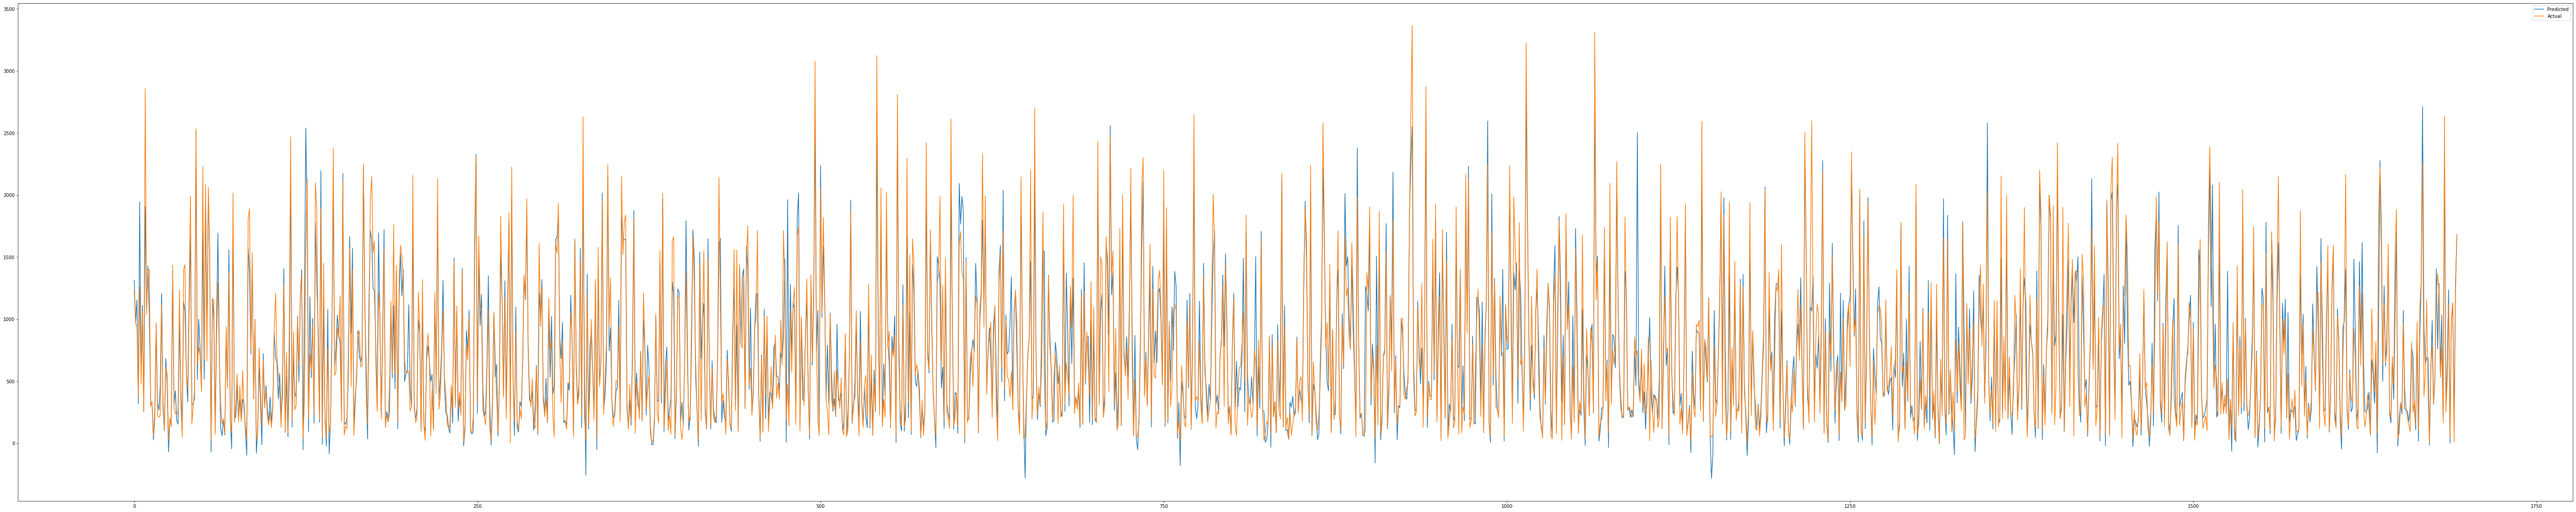

In [ ]:
plt.figure(figsize=(100,20))
plt.plot((y_test_preds))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()